# Import


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from pathlib import Path
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from joypy import joyplot

# Set directory

In [2]:
working_dir = '/home/khali/JCIM/Results/Study_1'

# Make radar charts

In [3]:
def get_median_for_metric(path, metric_name):
    summary_stats = []
    directories = []
    for directory in Path(working_dir).iterdir():
        if directory.is_dir() and str(directory).split('/')[-1].split('_')[0] == 'N':
            directories.append(str(directory).split('/')[-1])
            ds_r = pd.read_csv(directory/ 'DeepSCAMs.csv')[metric_name].mean()
            AL = pd.read_csv(directory/ 'TF_ML_AL.csv')[metric_name].mean()
            non_AL = pd.read_csv(directory / 'TF_ML_non_AL.csv')[metric_name].mean()
            summary_stats.append([ds_r, AL, non_AL])
    result = pd.DataFrame(summary_stats, columns=['DeepSCAMs', 'AL TF MLP', 'non AL TF MLP'], 
                index=directories)
    return result


## Make a radar chart for the test set

In [4]:
# Define figure names
figures_names_test = ['<b>AUC LB test</b>', '<b>AUC test</b>', '<b>AUC UB test</b>', '<b>Accuracy test</b>', 
      '<b>F1 test</b>', '<b>MCC test</b>']


# Make subplots to visualize 6 metrics for test set
fig = make_subplots(
    rows=2, cols=3, vertical_spacing=0.05,
    horizontal_spacing=0.11,
    subplot_titles=(figures_names_test), specs=[[{"type": "polar"}, {"type": "polar"}, {"type": "polar"}], 
                                 [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}]], 
    column_widths=[10, 10, 10], row_heights=[10, 10]
)

# Add a radar chart for AUC_LB_test
df_AUC_LB_test = get_median_for_metric(working_dir, 'AUC_LB_test')  # Calculate median for AUC_LB_test


AL_AUC_LB_test = df_AUC_LB_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_AUC_LB_test,
    theta=list(df_AUC_LB_test.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=1, col=1)

non_AL_AUC_LB_test = df_AUC_LB_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_AUC_LB_test,
    theta=list(df_AUC_LB_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=1)

DeepSCAMs_AUC_LB_test = df_AUC_LB_test['DeepSCAMs']   # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_AUC_LB_test,
    theta=list(df_AUC_LB_test.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=1, col=1)

# Add a radar chart for AUC_test
df_AUC_test = get_median_for_metric(working_dir, 'AUC_test')

AL_AUC_test = df_AUC_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_AUC_test,
    theta=list(df_AUC_test.index),
    fill='toself',
    name='AL TF MLP', 
    line_color='goldenrod'), row=1, col=2)


non_AL_AUC_test = df_AUC_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_AUC_test,
    theta=list(df_AUC_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=2)

DeepSCAMs_AUC_test = df_AUC_test['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_AUC_test,
    theta=list(df_AUC_test.index),
    fill='toself',
    name='DeepSCAMs', 
    line_color = 'lightblue'), row=1, col=2)

fig.update_layout(
    showlegend=True
)


# Add a radar chart for AUC_UB_test

df_UB_AUC_test = get_median_for_metric(working_dir, 'AUC_UB_test')

AL_UB_AUC_test = df_UB_AUC_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_UB_AUC_test,
    theta=list(df_UB_AUC_test.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=1, col=3)

non_AL_UB_AUC_test = df_UB_AUC_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_UB_AUC_test,
    theta=list(df_UB_AUC_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=3)


DeepSCAMs_UB_AUC_test = df_UB_AUC_test['DeepSCAMs'] # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_UB_AUC_test,
    theta=list(df_UB_AUC_test.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=1, col=3)

## Change positions of subplot names in the first row
fig.layout.annotations[0].update(y=0.93)
fig.layout.annotations[1].update(y=0.93)
fig.layout.annotations[2].update(y=0.93)


# Add a radar chart for Accuracy_test
df_Accuracy_test = get_median_for_metric(working_dir, 'Accuracy_test')

AL_Accuracy_test = df_Accuracy_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_Accuracy_test,
    theta=list(df_Accuracy_test.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=1)

non_AL_Accuracy_test = df_Accuracy_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_Accuracy_test,
    theta=list(df_Accuracy_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=1)

DeepSCAMs_Accuracy_test = df_Accuracy_test['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_Accuracy_test,
    theta=list(df_Accuracy_test.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=1)

# Add a radar chart for F1_test
df_F1_test = get_median_for_metric(working_dir, 'F1_test')

AL_F1_test = df_F1_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_F1_test,
    theta=list(df_F1_test.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=2)

non_F1_test = df_F1_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_F1_test,
    theta=list(df_F1_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=2)

DeepSCAMs_F1_test = df_F1_test['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_F1_test,
    theta=list(df_F1_test.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=2)


# Add a radar chart for MCC_test
df_MCC_test = get_median_for_metric(working_dir, 'MCC_test')

AL_MCC_test = df_MCC_test['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_MCC_test,
    theta=list(df_MCC_test.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=3)

non_MCC_test = df_MCC_test['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_MCC_test,
    theta=list(df_MCC_test.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=3)

DeepSCAMs_MCC_test = df_MCC_test['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_MCC_test,
    theta=list(df_MCC_test.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=3)

## Change positions of subplot names in the second row
fig.layout.annotations[3].update(y=0.43)
fig.layout.annotations[4].update(y=0.43)
fig.layout.annotations[5].update(y=0.43)

## Remove duplicating legends
names = set()
fig.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))
fig.update_polars(dict(
        angularaxis= dict(direction = "counterclockwise", 
                         rotation=220)
              
              )
)
## Save as svg and png
fig.write_image(str('test.svg'), width=900, height=900, scale=10)
fig.write_image(str('test.png'), width=900, height=900, scale=10)

## Make a radar chart for the validation set

In [5]:
figures_names_validation = ['<b>AUC LB validation</b>', '<b>AUC validation</b>', '<b>AUC UB validation</b>', 
                            '<b>Accuracy validation</b>', '<b>F1 validation</b>', '<b>MCC validation</b>']

# Make subplots to visualize 6 metrics of validation set
fig = make_subplots(
    rows=2, cols=3, vertical_spacing=0.05,
    horizontal_spacing=0.12,
    subplot_titles=(figures_names_validation), 
    specs=[[{"type": "polar"}, {"type": "polar"}, {"type": "polar"}], 
           [{"type": "polar"}, {"type": "polar"}, {"type": "polar"}]], 
    column_widths=[10, 10, 10], row_heights=[10, 10]
)

# Add a radar chart for AUC_LB_validation
df_AUC_LB_val = get_median_for_metric(working_dir, 'AUC_LB_validation')

AL_AUC_LB_val = df_AUC_LB_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_AUC_LB_val,
    theta=list(df_AUC_LB_val.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=1, col=1)

non_AL_AUC_LB_val = df_AUC_LB_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_AUC_LB_val,
    theta=list(df_AUC_LB_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=1)

DeepSCAMs_AUC_LB_val = df_AUC_LB_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_AUC_LB_val,
    theta=list(df_AUC_LB_val.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=1, col=1)

# Add a radar chart for AUC_validation
df_AUC_val = get_median_for_metric(working_dir, 'AUC_validation')

AL_AUC_val = df_AUC_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_AUC_val,
    theta=list(df_AUC_val.index),
    fill='toself',
    name='AL TF MLP', 
    line_color='goldenrod'), row=1, col=2)


non_AL_AUC_val = df_AUC_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_AUC_val,
    theta=list(df_AUC_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=2)

DeepSCAMs_AUC_val = df_AUC_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_AUC_val,
    theta=list(df_AUC_val.index),
    fill='toself',
    name='DeepSCAMs', 
    line_color = 'lightblue'), row=1, col=2)
fig.update_layout(
    showlegend=True
)

# Add a radar chart for AUC_UB_validation
df_UB_AUC_val = get_median_for_metric(working_dir, 'AUC_UB_validation')

AL_UB_AUC_val = df_UB_AUC_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_UB_AUC_val,
    theta=list(df_UB_AUC_val.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=1, col=3)

non_AL_UB_AUC_val = df_UB_AUC_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_UB_AUC_val,
    theta=list(df_UB_AUC_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=1, col=3)


DeepSCAMs_UB_AUC_val = df_UB_AUC_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_UB_AUC_val,
    theta=list(df_UB_AUC_val.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=1, col=3)

## Change positions of subplot names in the first row
fig.layout.annotations[0].update(y=0.93)
fig.layout.annotations[1].update(y=0.93)
fig.layout.annotations[2].update(y=0.93)


# Add a radar chart for Accuracy_validation
df_Accuracy_val = get_median_for_metric(working_dir, 'Accuracy_validation')

AL_Accuracy_val = df_Accuracy_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_Accuracy_val,
    theta=list(df_Accuracy_val.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=1)

non_AL_Accuracy_val = df_Accuracy_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_AL_Accuracy_val,
    theta=list(df_Accuracy_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=1)

DeepSCAMs_Accuracy_val = df_Accuracy_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_Accuracy_val,
    theta=list(df_Accuracy_val.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=1)

# Add a radar chart for F1_validation
df_F1_val = get_median_for_metric(working_dir, 'F1_validation')

AL_F1_val = df_F1_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_F1_val,
    theta=list(df_F1_val.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=2)

non_F1_val = df_F1_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_F1_val,
    theta=list(df_F1_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=2)

DeepSCAMs_F1_val = df_F1_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_F1_val,
    theta=list(df_F1_val.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=2)


# Add a radar chart for MCC_validation
df_MCC_val = get_median_for_metric(working_dir, 'MCC_validation')

AL_MCC_val = df_MCC_val['AL TF MLP']  # Add chart for AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=AL_MCC_val,
    theta=list(df_MCC_val.index),
    fill='toself',
    name='AL TF MLP',
    line_color='goldenrod'), row=2, col=3)

non_MCC_val = df_MCC_val['non AL TF MLP']  # Add chart for non-AL TF MLP
fig.add_trace(
    go.Scatterpolar(r=non_MCC_val,
    theta=list(df_MCC_val.index),
    fill='toself',
    name='non AL TF MLP', 
    line_color='gray'), row=2, col=3)

DeepSCAMs_MCC_val = df_MCC_val['DeepSCAMs']  # Add chart for DeepSCAMs
fig.add_trace(
    go.Scatterpolar(r=DeepSCAMs_MCC_val,
    theta=list(df_MCC_val.index),
    fill='toself',
    name='DeepSCAMs',
    line_color = 'lightblue'), row=2, col=3)

## Change positions of subplot names in the second row
fig.layout.annotations[3].update(y=0.43)
fig.layout.annotations[4].update(y=0.43)
fig.layout.annotations[5].update(y=0.43)

## Remove duplicating legends

names = set()
fig.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))

fig.update_polars(dict(
        angularaxis= dict(direction = "counterclockwise", 
                         rotation=220)
              
              )
)
## Save figures as png and svg
fig.write_image(str('validation.svg'), width=900, height=900, scale=10)
fig.write_image(str('validation.png'), width=900, height=900, scale=10)

# Make violin plots

In [6]:
def format_for_violin(list_of_values, study_name, method):
    dir_m_cont = [[m_v, study_name, method]for m_v in list_of_values]
    dir_m_cont = pd.DataFrame(dir_m_cont, columns=['value', 'study_name', 'method'])
    return dir_m_cont

In [7]:
def get_median_for_metric(path, metric_name):
    summary_stats = []
    directories = []
    results = []
    for directory in Path(path).iterdir():
        try:
            if directory.is_dir() and str(directory).split('/')[-1].split('_')[0] == 'N':
                current_dir = str(directory).split('/')[-1]
                ds_r = pd.read_csv(directory/ 'DeepSCAMs.csv')[metric_name].to_list()
                ds_step = format_for_violin(ds_r, current_dir, 'DeepSCAMs')
                results.append(ds_step)
                
                AL = pd.read_csv(directory / 'TF_ML_AL.csv')[metric_name].to_list()
                AL_step = format_for_violin(AL, current_dir, 'TF_ML_AL')
                results.append(AL_step)
                
                non_AL = pd.read_csv(directory / 'TF_ML_non_AL.csv')[metric_name].to_list()
                non_AL_step = format_for_violin(non_AL, current_dir, 'TF_ML_non_AL')
                results.append(non_AL_step)
        except:
            print('Not a directory')
    result_df = pd.concat(results)
    result_df = result_df.reset_index()
    return result_df

In [8]:
def plot_violin(directory, metric, setting):
    metric_merged = get_median_for_metric(directory, metric)
    
    fig = go.Figure()
    
    fig.add_trace(go.Violin(x=metric_merged['study_name'][metric_merged['method'] == 'TF_ML_AL' ],
                            y=metric_merged['value'][metric_merged['method'] == 'TF_ML_AL' ],
                            legendgroup='TF_ML_AL', scalegroup='TF_ML_AL', name='TF_ML_AL',
                            line_color='goldenrod', points=setting)            
             )
    
    fig.add_trace(go.Violin(x=metric_merged['study_name'][metric_merged['method'] == 'TF_ML_non_AL' ],
                            y=metric_merged['value'][metric_merged['method'] == 'TF_ML_non_AL' ],
                            legendgroup='TF_ML_non_AL', scalegroup='TF_ML_non_AL', name='TF_ML_non_AL',
                            line_color='gray', points=setting)
             )
    
    fig.add_trace(go.Violin(x=metric_merged['study_name'][metric_merged['method'] == 'DeepSCAMs' ],
                            y=metric_merged['value'][metric_merged['method'] == 'DeepSCAMs' ],
                            legendgroup='DeepSCAMs', scalegroup='DeepSCAMs', name='DeepSCAMs',
                            line_color='lightblue', points=setting)
             )
    fig.update_traces(box_visible=True, meanline_visible=True, marker_line_width=1, marker_line_color="black")
    fig.update_layout(violinmode='group', plot_bgcolor="rgb(255, 255, 255)", 
                      height=600, width=1200, title_text="<b>{}</b>".format(metric.replace('_', ' ')))
    
    fig.write_image(str('{}_{}.svg'.format(metric, str(setting))), width=1200, height=600, scale=5)
    fig.write_image(str('{}_{}.png'.format(metric, str(setting))), width=1200, height=600, scale=5)
    

In [9]:
metrics = ['AUC_LB_validation', 'AUC_validation',  'AUC_UB_validation',  'Accuracy_validation',
           'F1_validation', 'MCC_validation', 'AUC_LB_test', 'AUC_test', 'AUC_UB_test',
           'Accuracy_test', 'F1_test', 'MCC_test']

In [10]:
for met in metrics:
    plot_violin(working_dir, met, 'all')
    plot_violin(working_dir, met, False)

# Ridgeline plot

In [11]:
def get_data_for_ridge_line(path, metric_name):
    summary_stats = []
    directories = []
    results = []
    for directory in Path(path).iterdir():
        try:
            if directory.is_dir() and str(directory).split('/')[-1].split('_')[0] == 'N':
                current_dir = str(directory).split('/')[-1]
            
                ds_r = pd.read_csv(directory/ 'DeepSCAMs.csv')[metric_name].to_list()
                AL = pd.read_csv(directory / 'TF_ML_AL.csv')[metric_name].to_list()
                non_AL = pd.read_csv(directory / 'TF_ML_non_AL.csv')[metric_name].to_list()
                current_dir = [current_dir for i in range(len(ds_r))]
                
                step = pd.DataFrame({'DeepSCAMs': ds_r, 
                              'TF_ML_AL': AL, 
                              'TF_ML_non_AL': non_AL, 
                              'study_name': current_dir})
                results.append(step)
        except:
            print('Not a directory')
    result_df = pd.concat(results)
    result_df = result_df.reset_index(drop=True)
    return result_df

In [12]:
def make_ridgeline_plt_for_metric(direct, metric_name):
    plt.rcParams['axes.labelsize'] = 25
    plt.rcParams['xtick.labelsize'] = 25
    plt.rcParams["legend.fontsize"] = 25
    plt.rcParams['font.size'] = 28

    met_data = get_data_for_ridge_line(direct, metric_name)
    plt.figure()

    ax, fig = joyplot(
        data=met_data[['DeepSCAMs', 'TF_ML_non_AL', 'TF_ML_AL', 'study_name']], 
        by='study_name',
        column=['DeepSCAMs', 'TF_ML_non_AL', 'TF_ML_AL'],
        color=['#add8e6', '#808080', '#daa520'],
        legend=True,
        alpha=0.85,
        figsize=(30, 15)
    )
    plt.title('{}'.format(metric_name.replace('_', ' ')), fontsize=40)
    plt.show()
    ax.savefig('{}_ridgeline.png'.format(metric_name), bbox_inches="tight", transparent=True)
    ax.savefig('{}_ridgeline.svg'.format(metric_name), bbox_inches="tight")
    

    

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.7889981676613346) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.7125226884443251) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

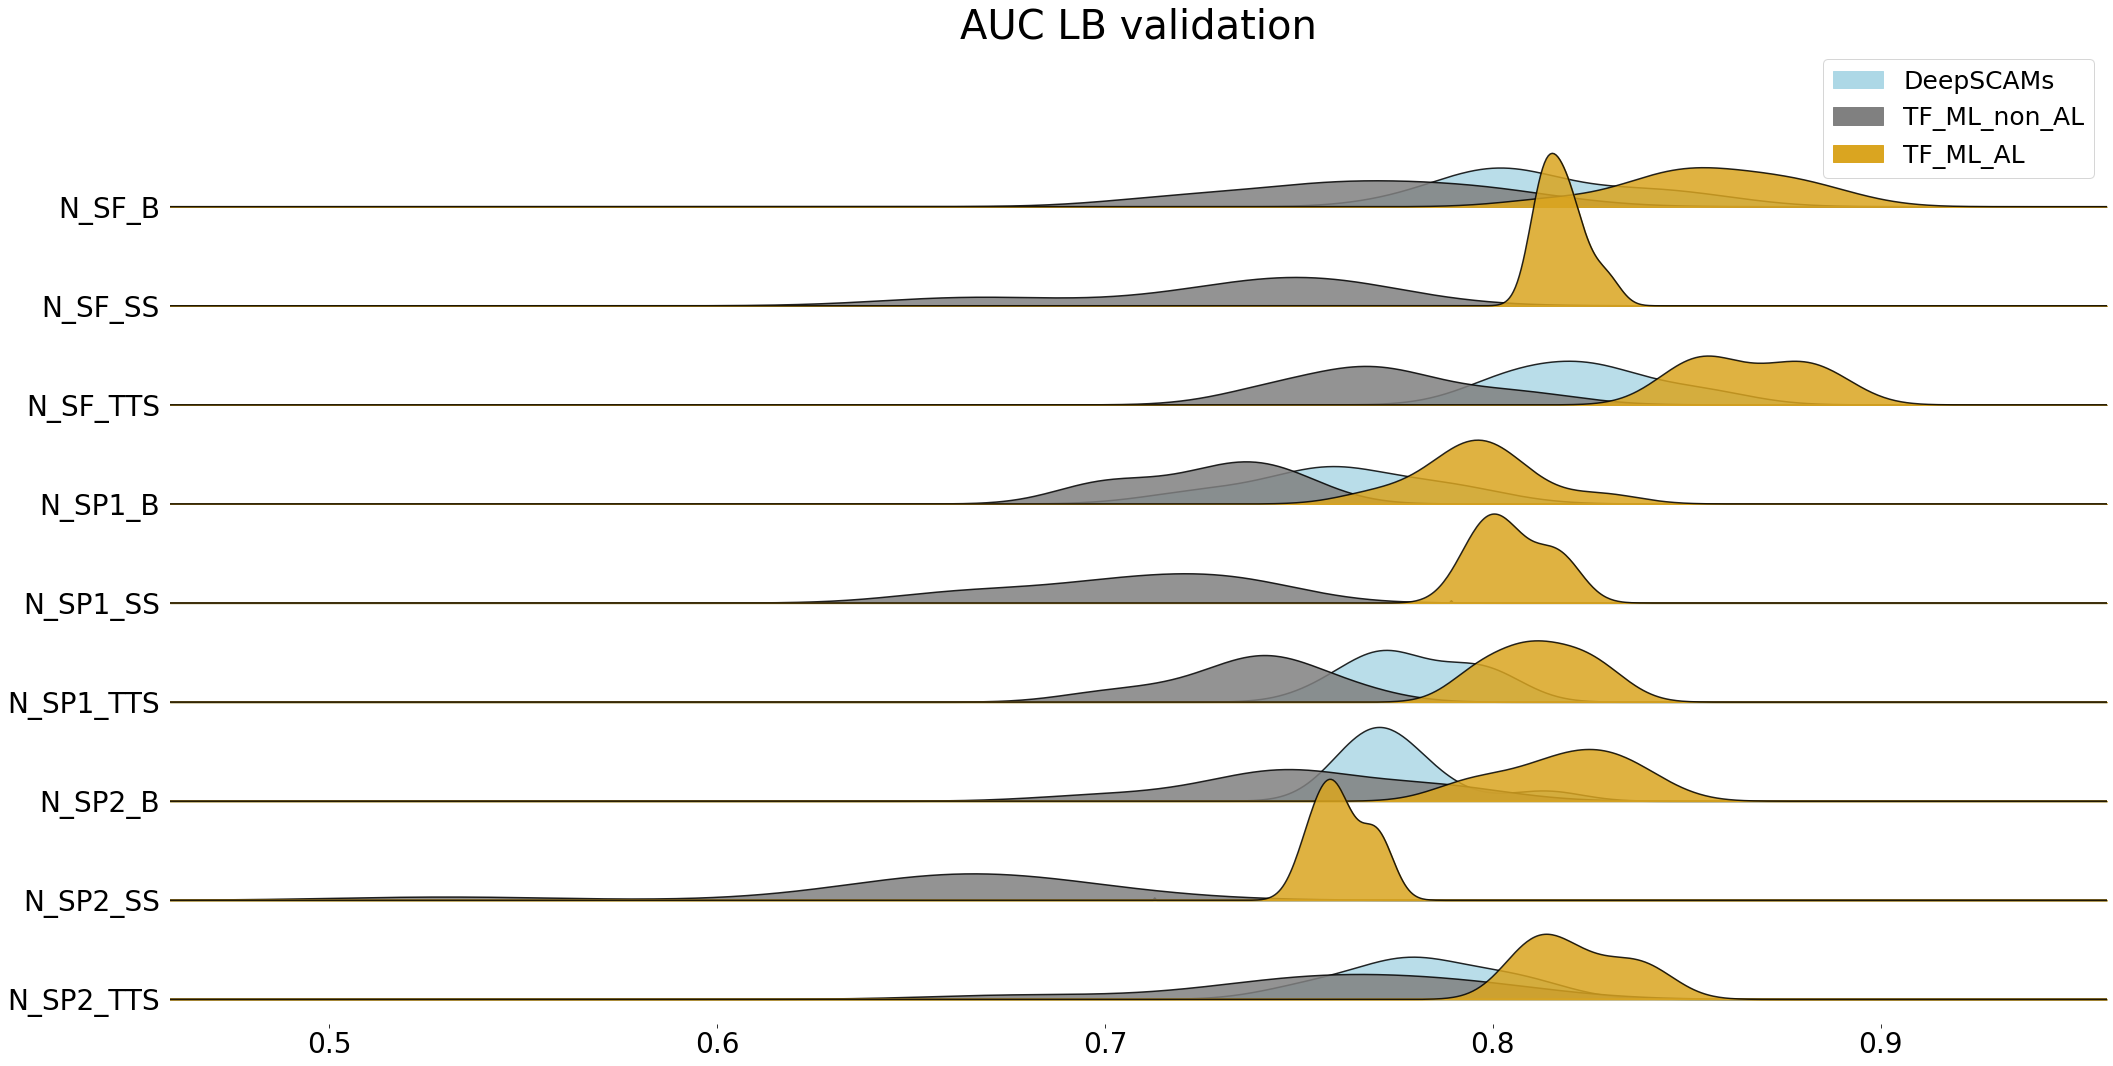

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.8250462840518381) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

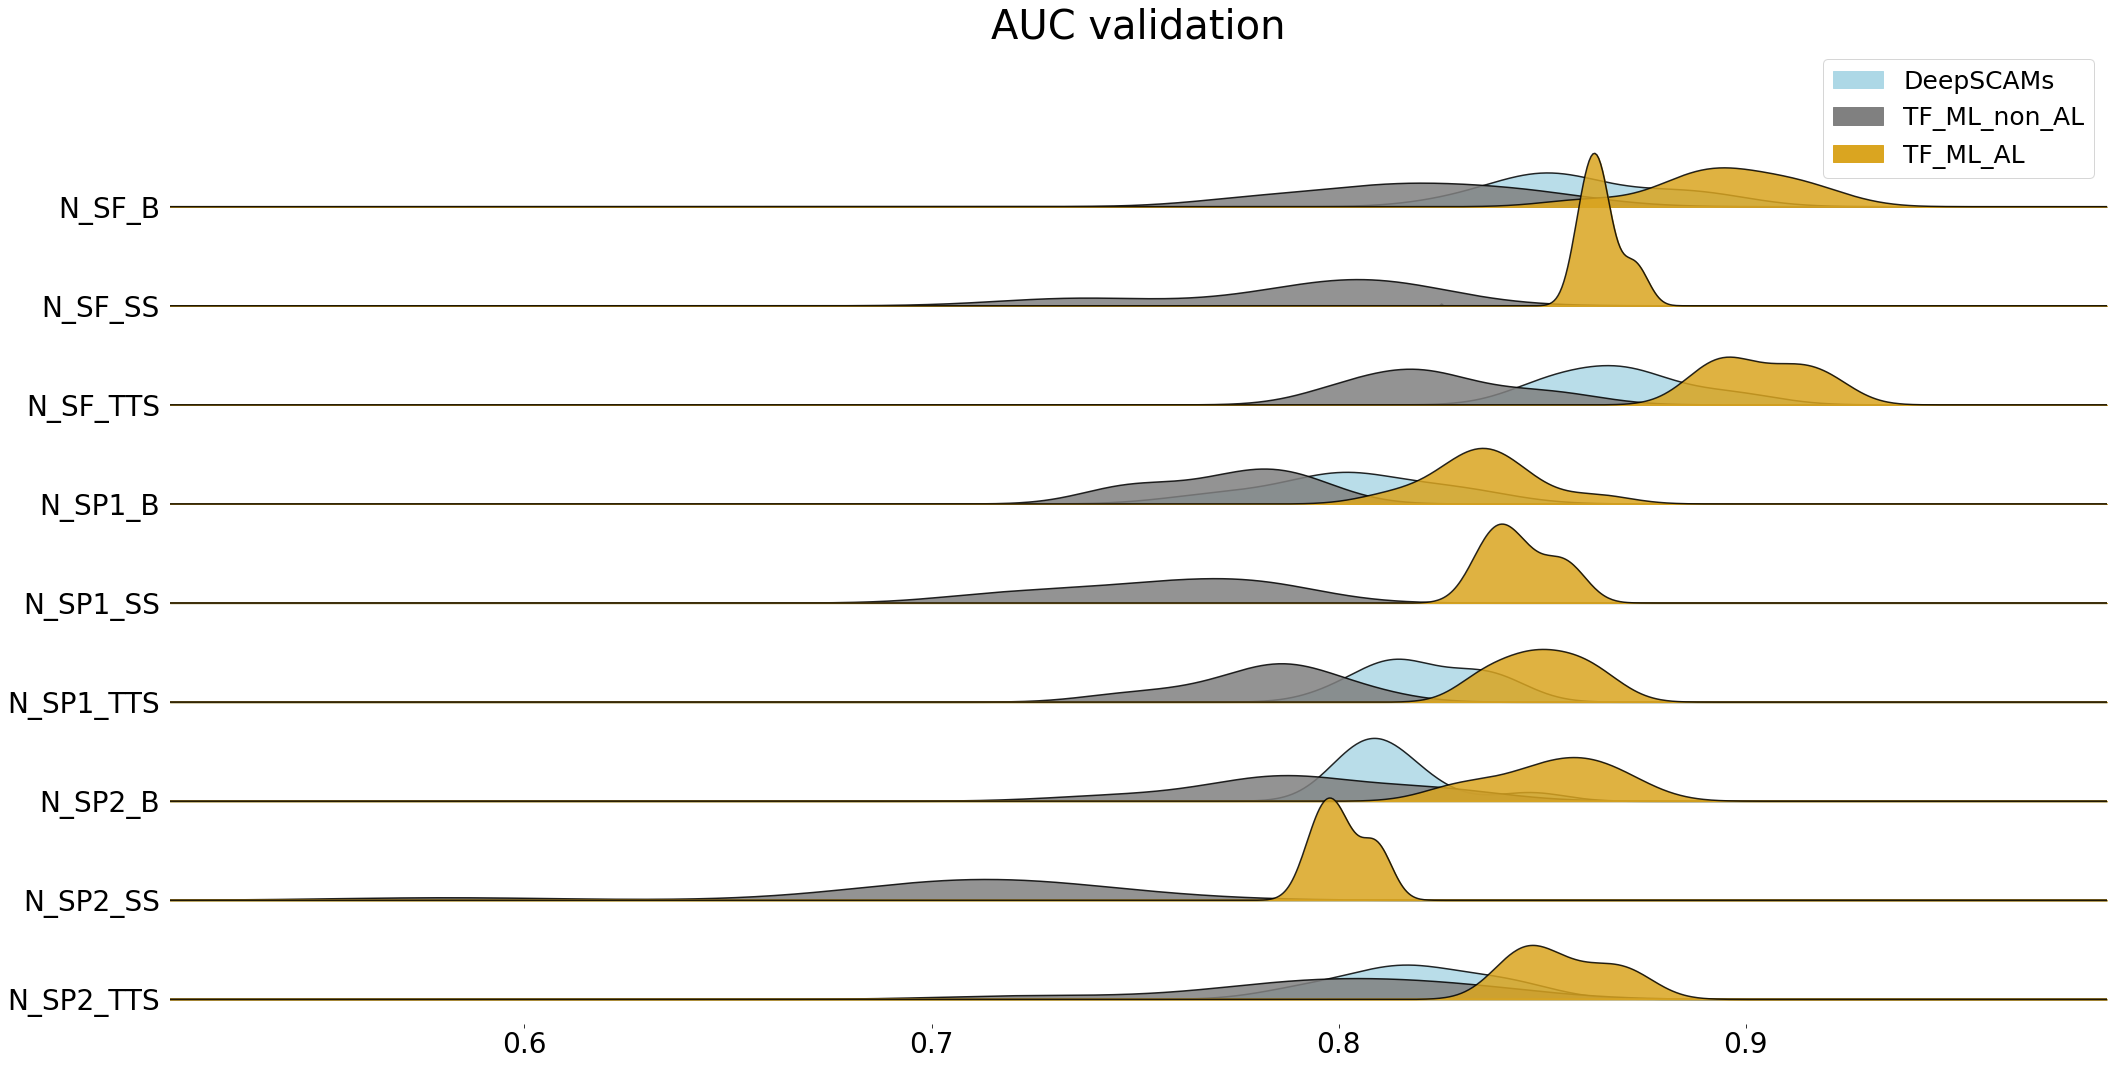

<Figure size 432x288 with 0 Axes>

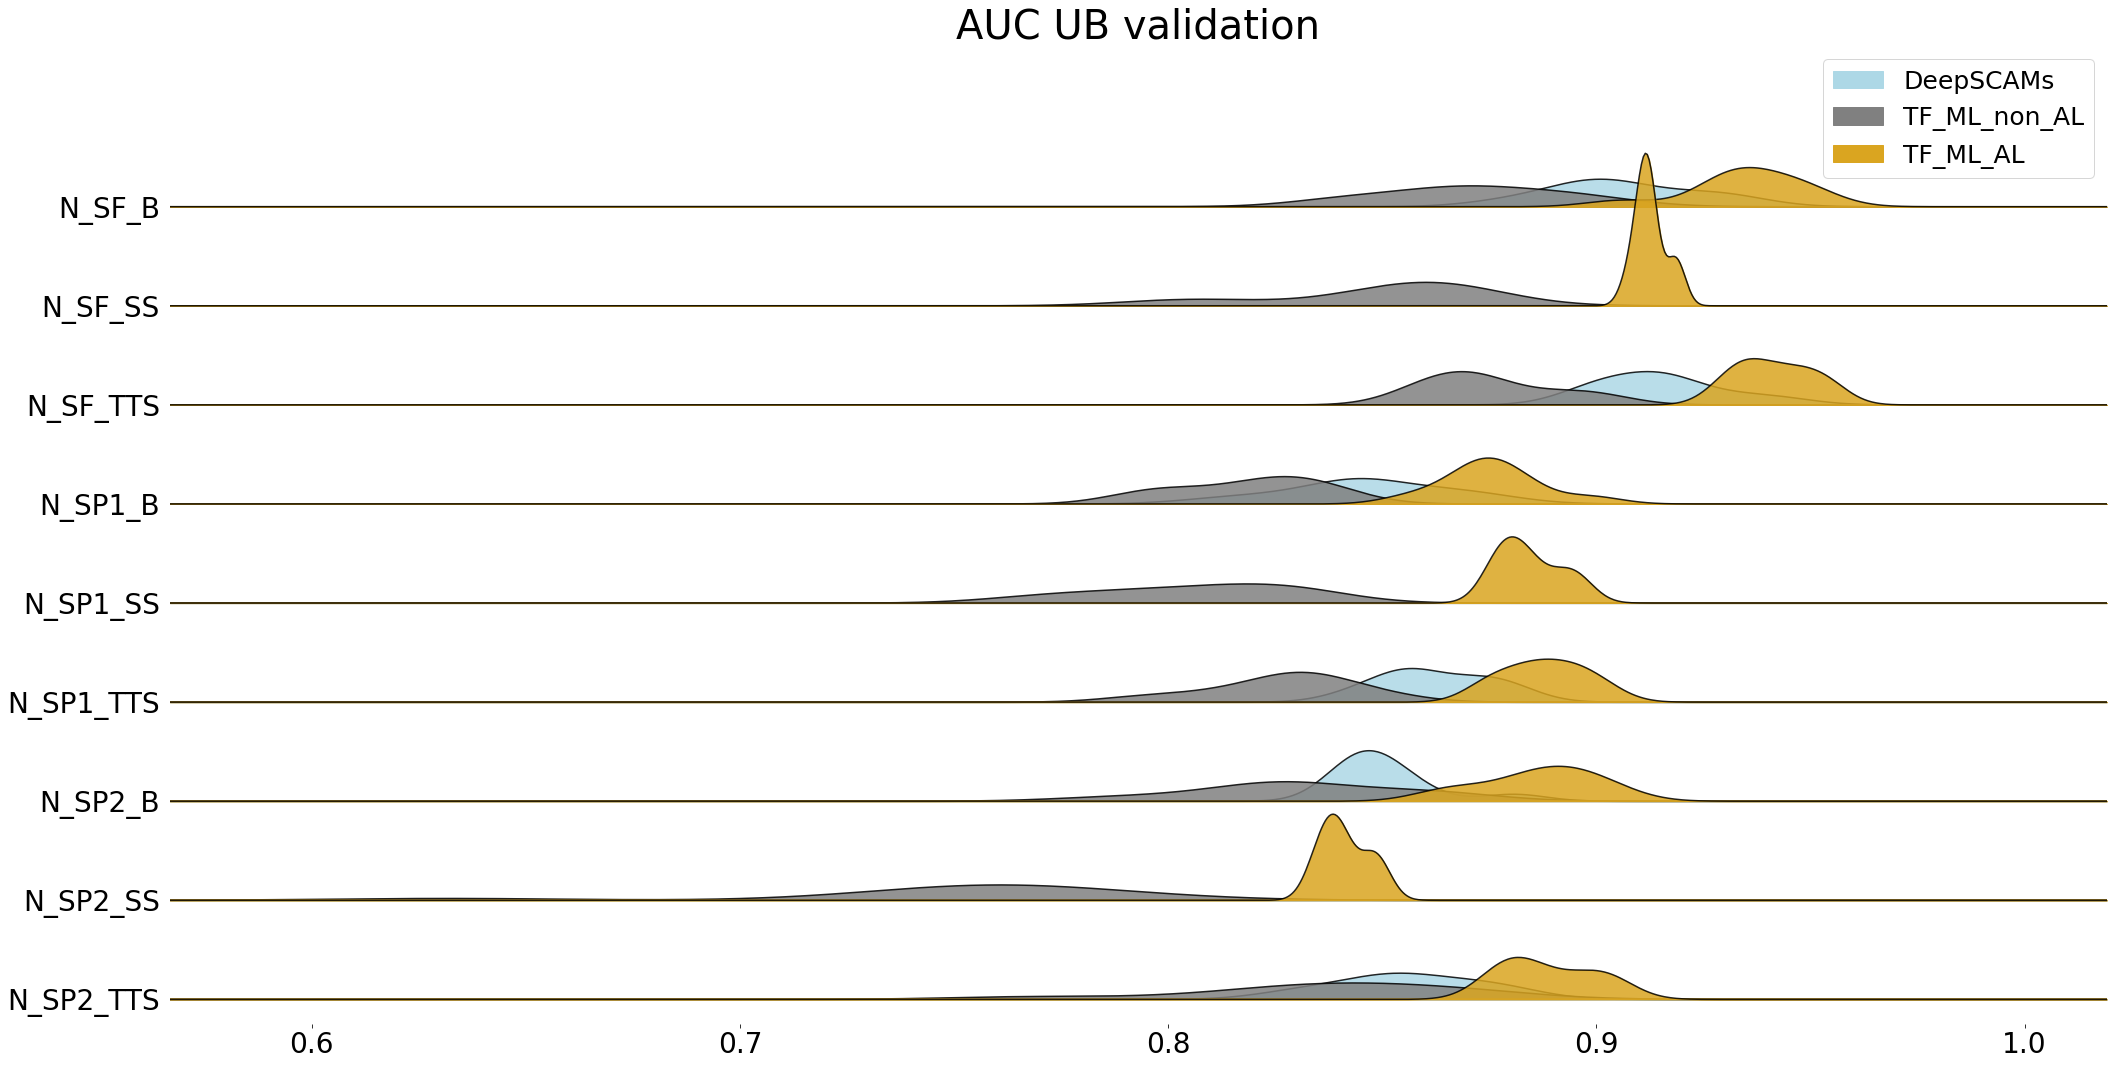

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.7963636363636364) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.6505102040816326) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

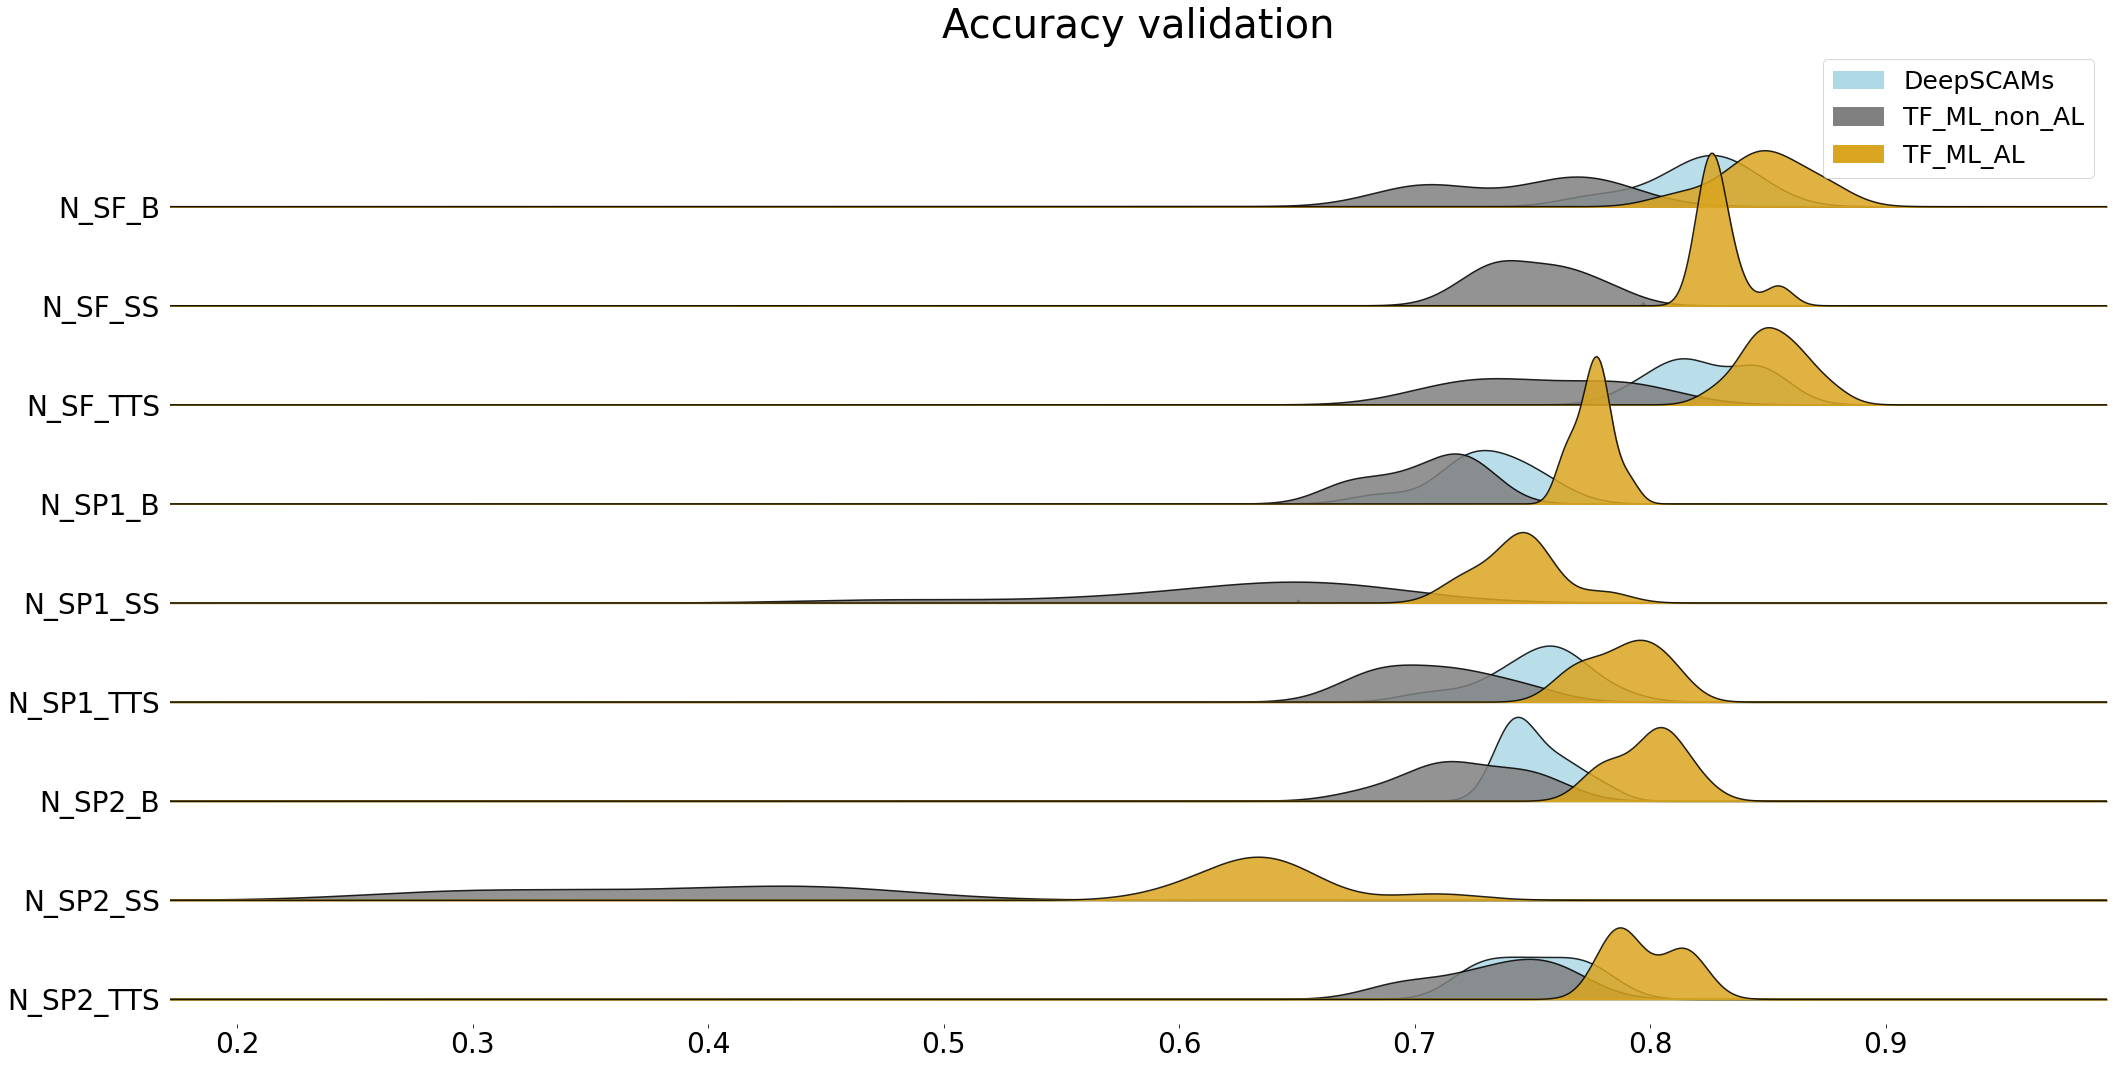

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.5982404692082111) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.5161290322580645) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

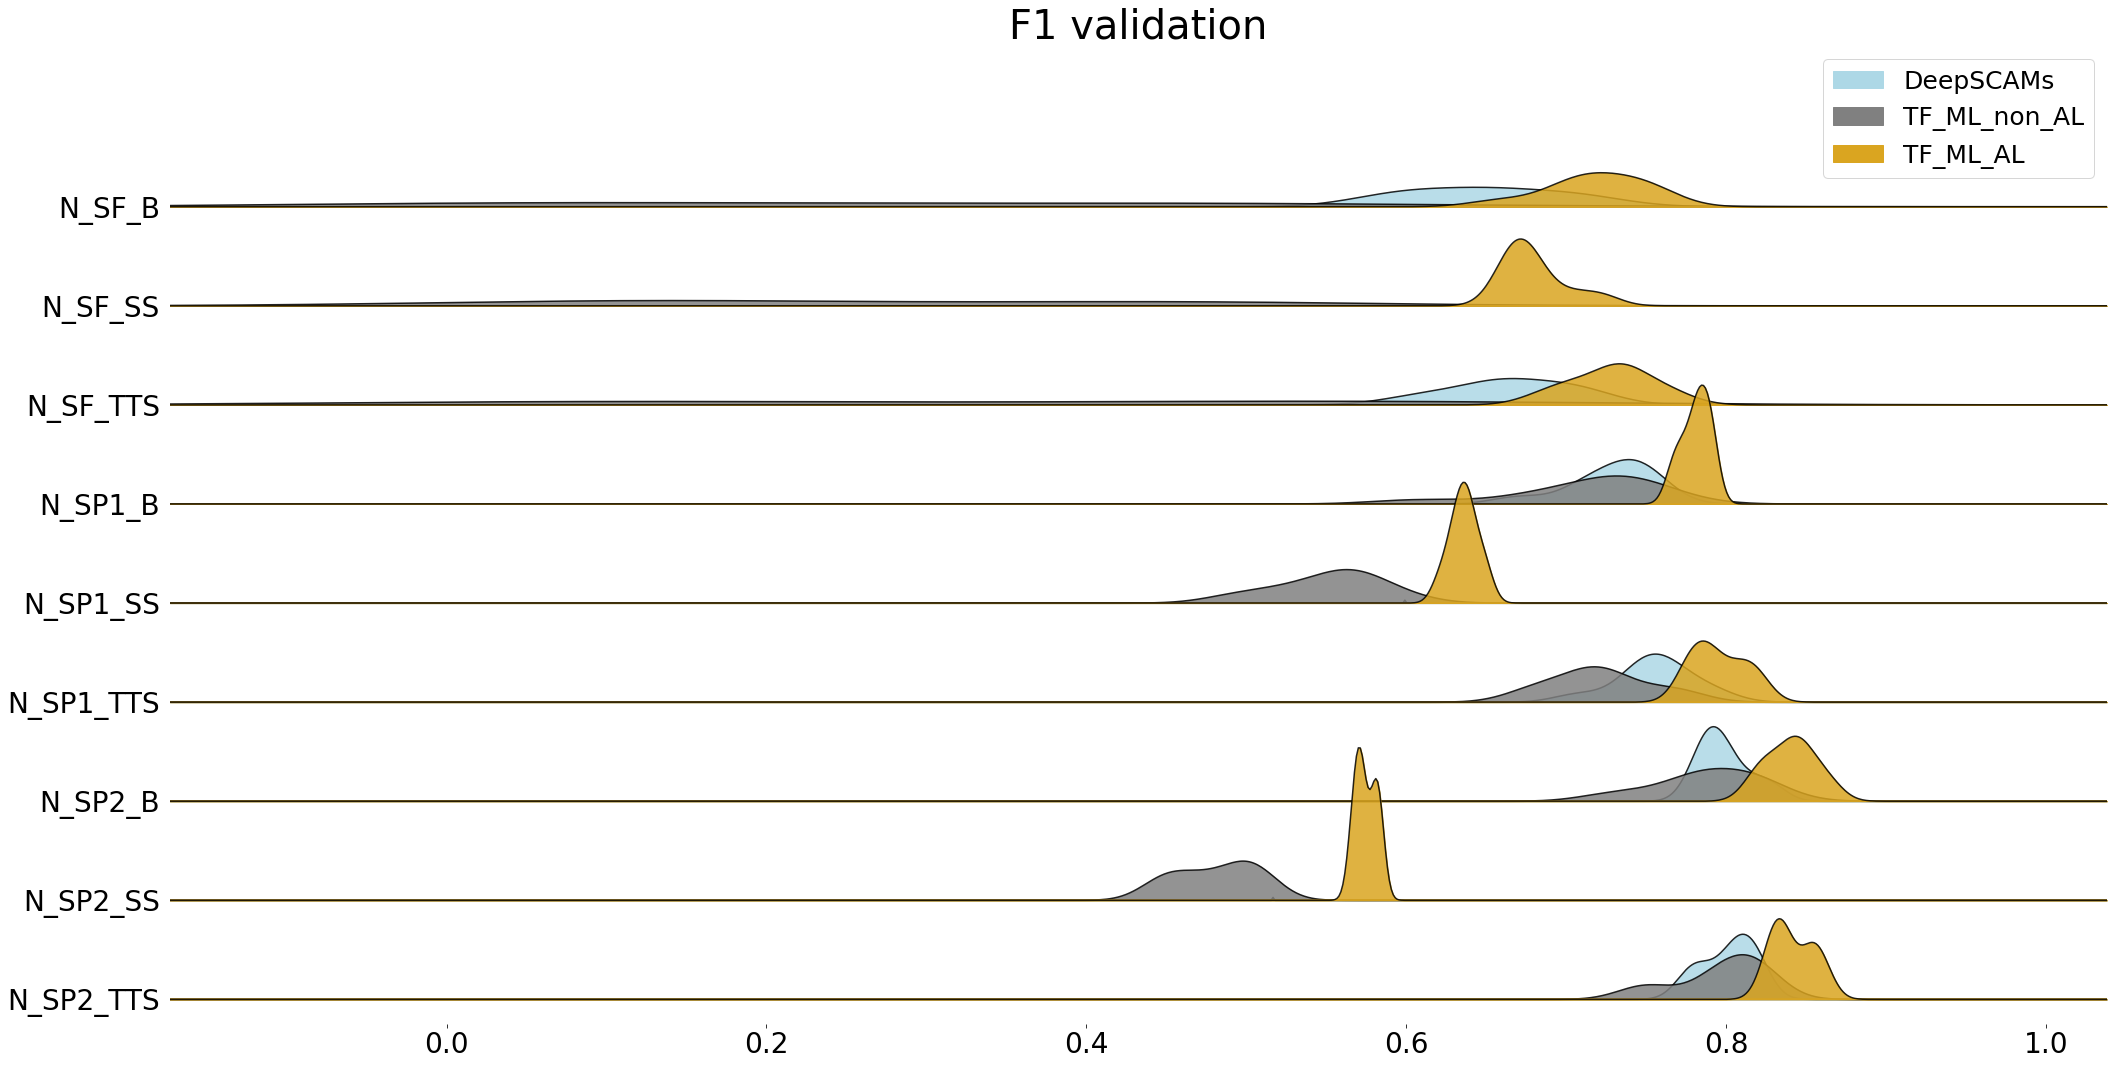

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.4714166192463566) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.2616597130985363) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

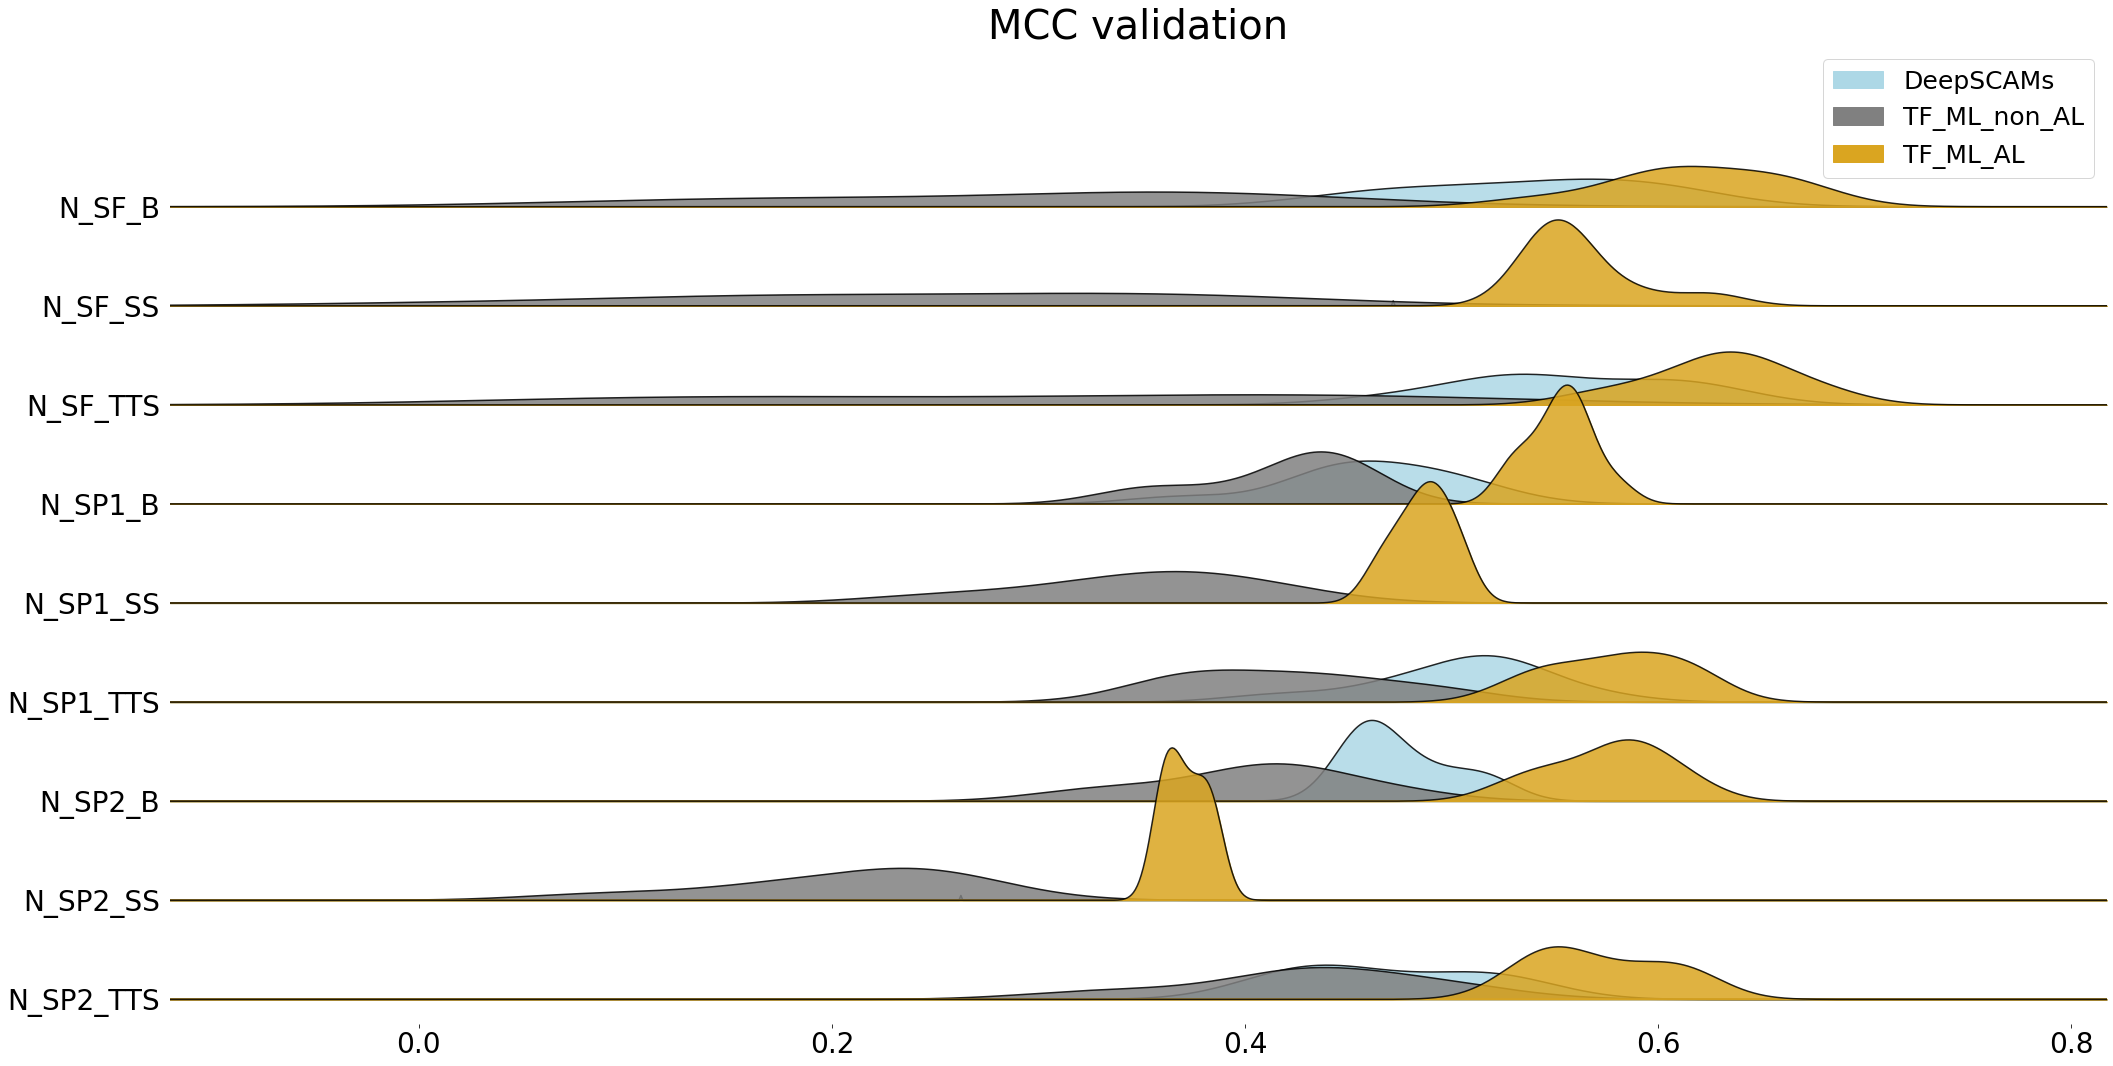

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.7465717001292439) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

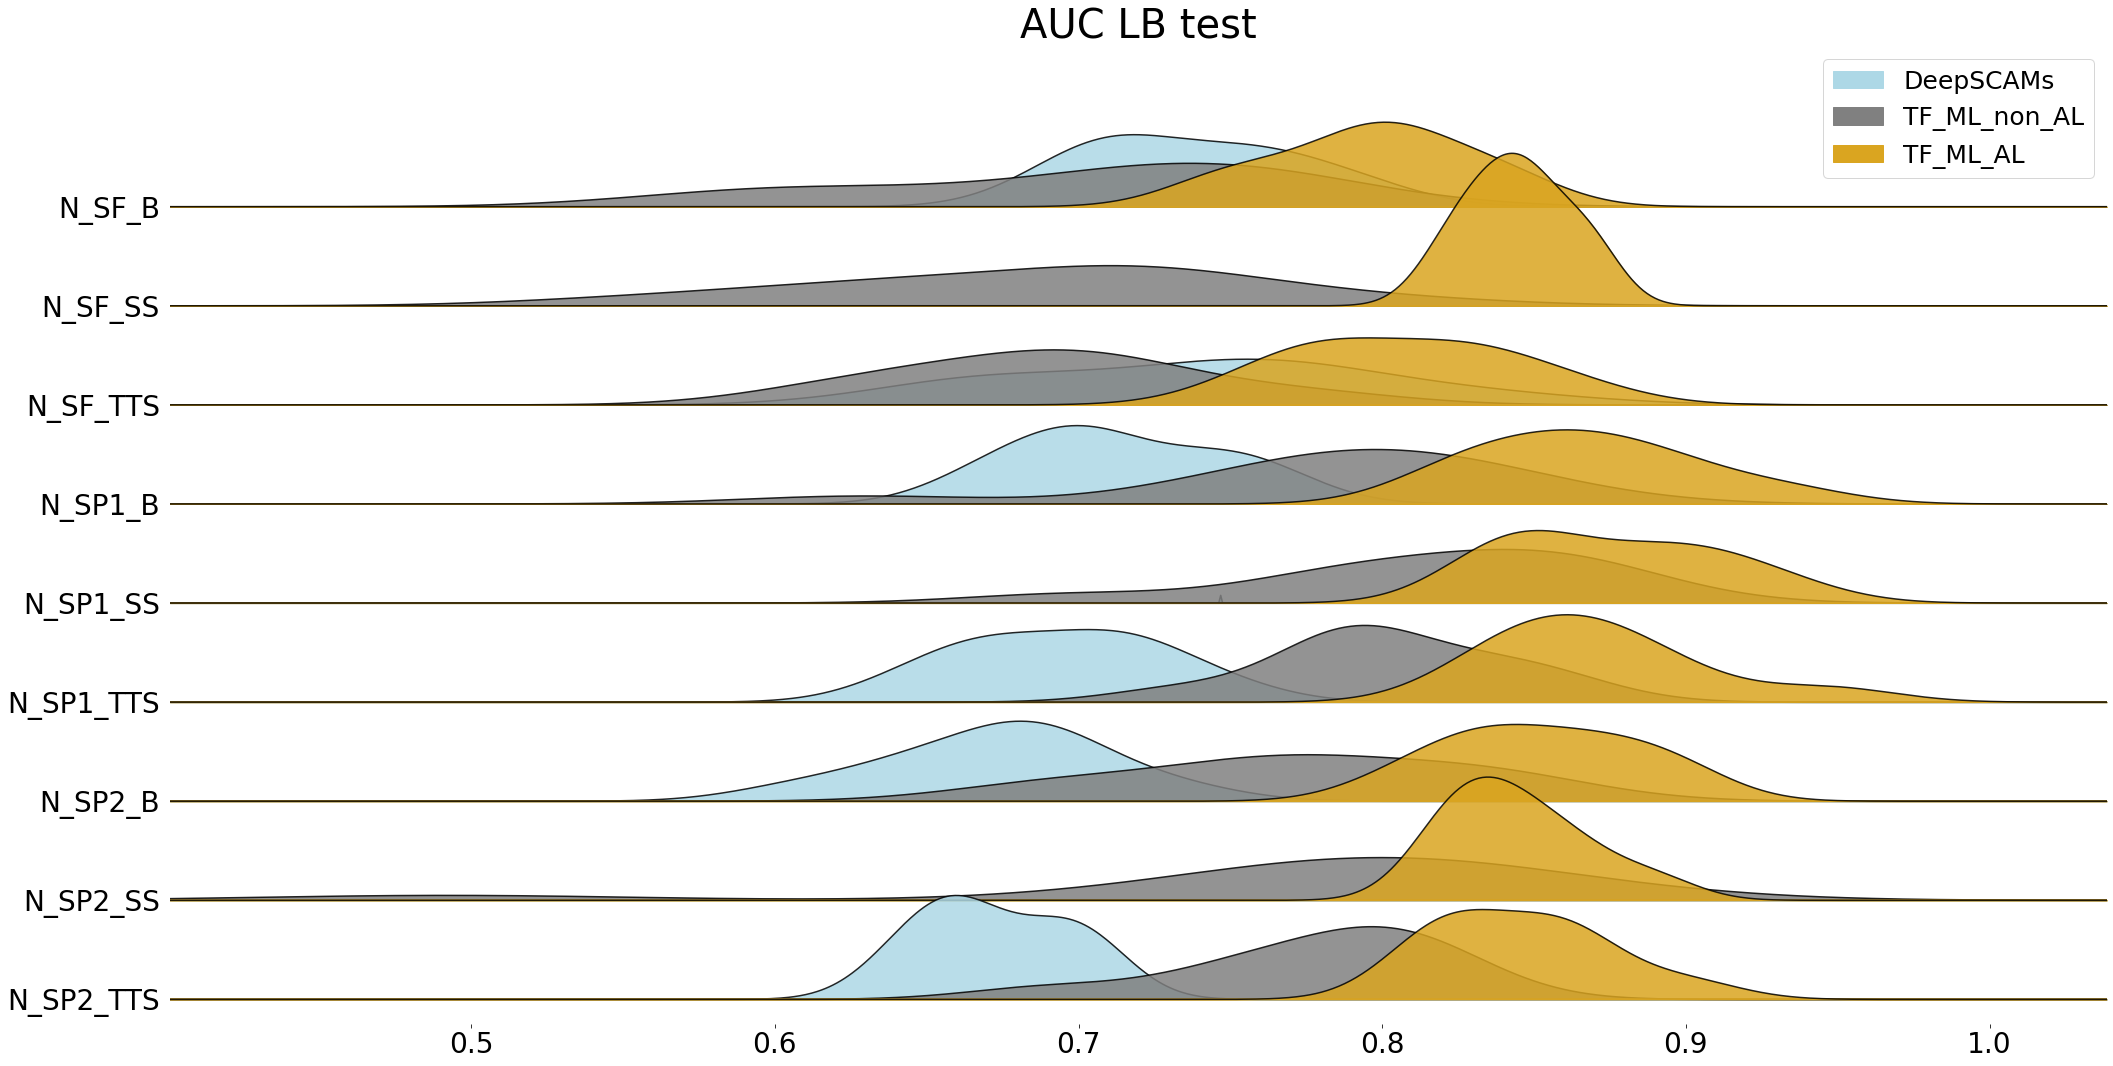

<Figure size 432x288 with 0 Axes>

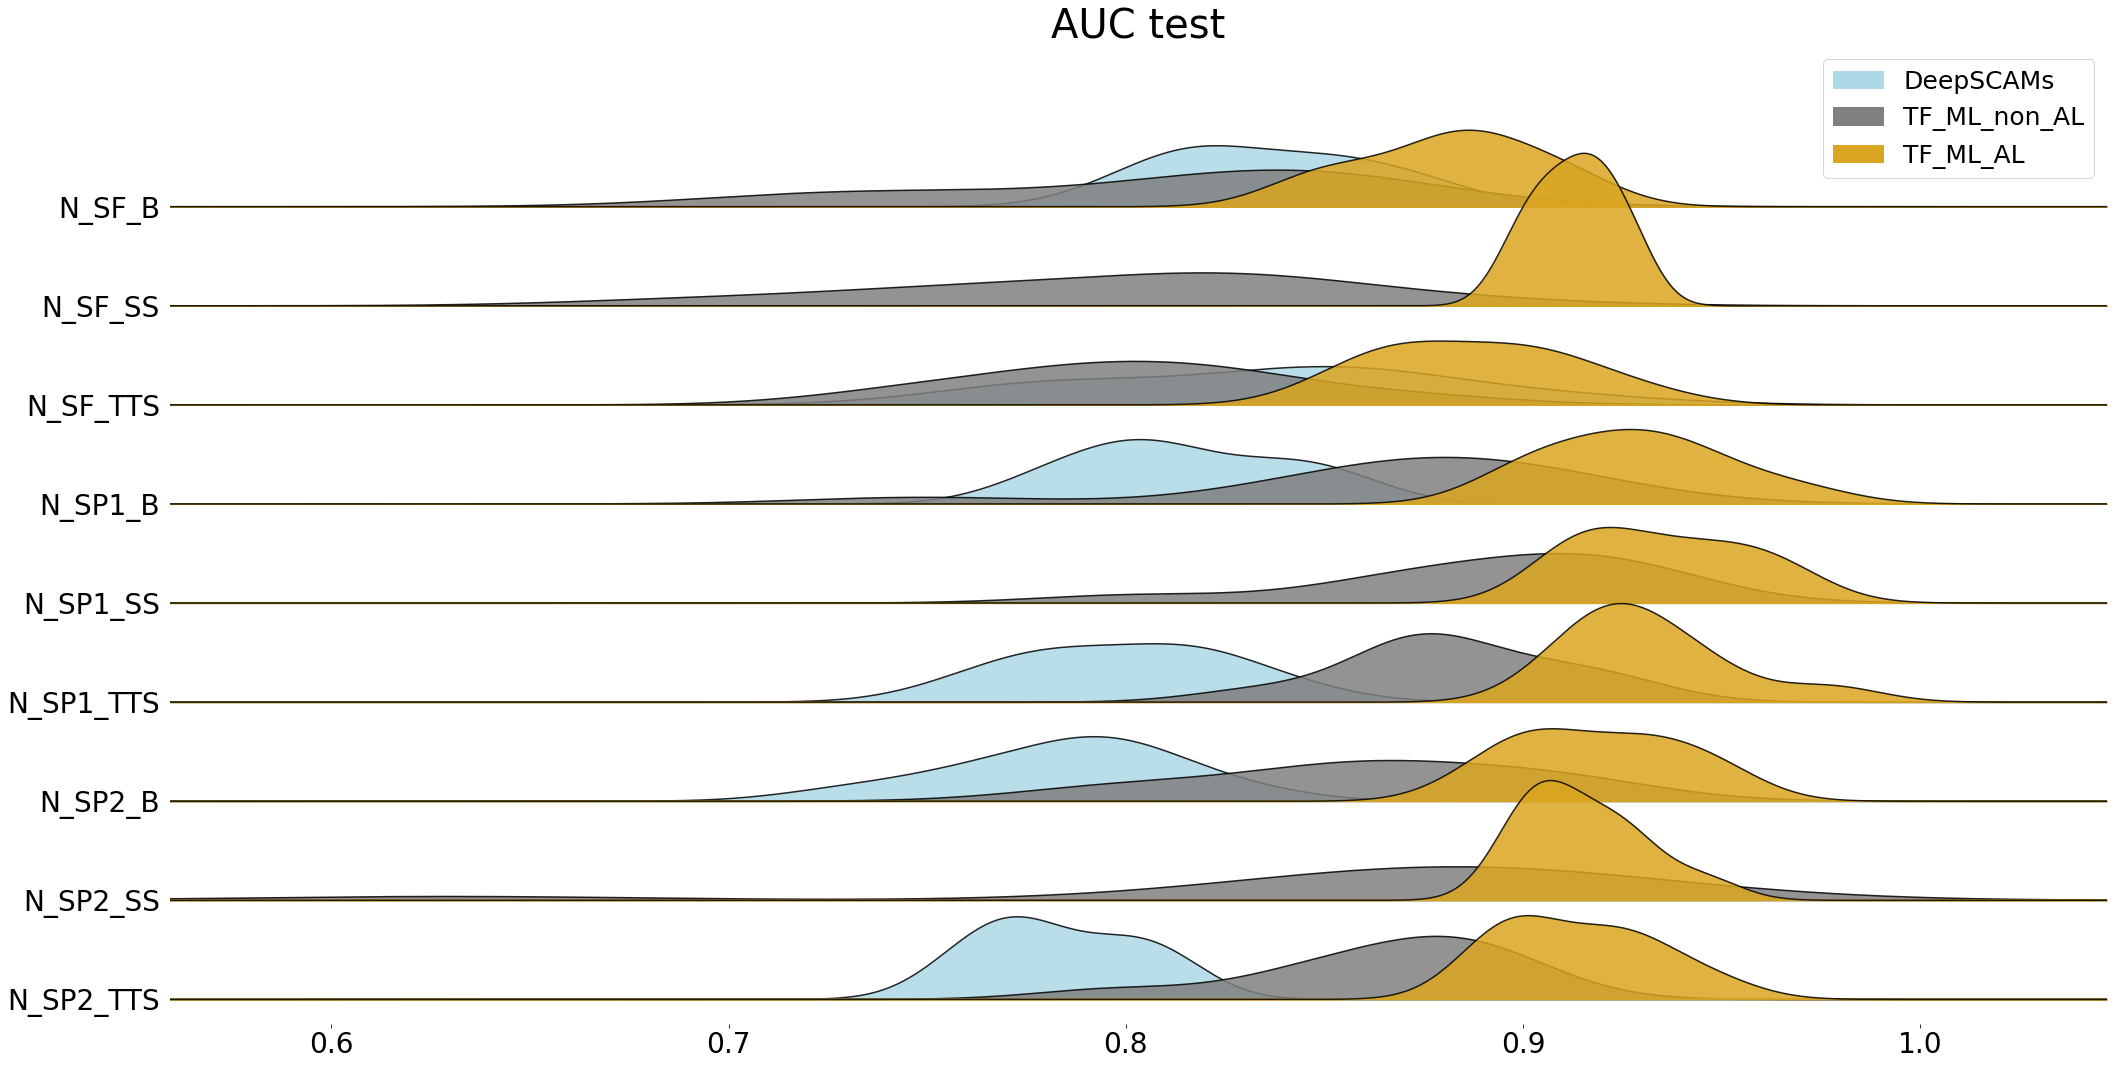

<Figure size 432x288 with 0 Axes>

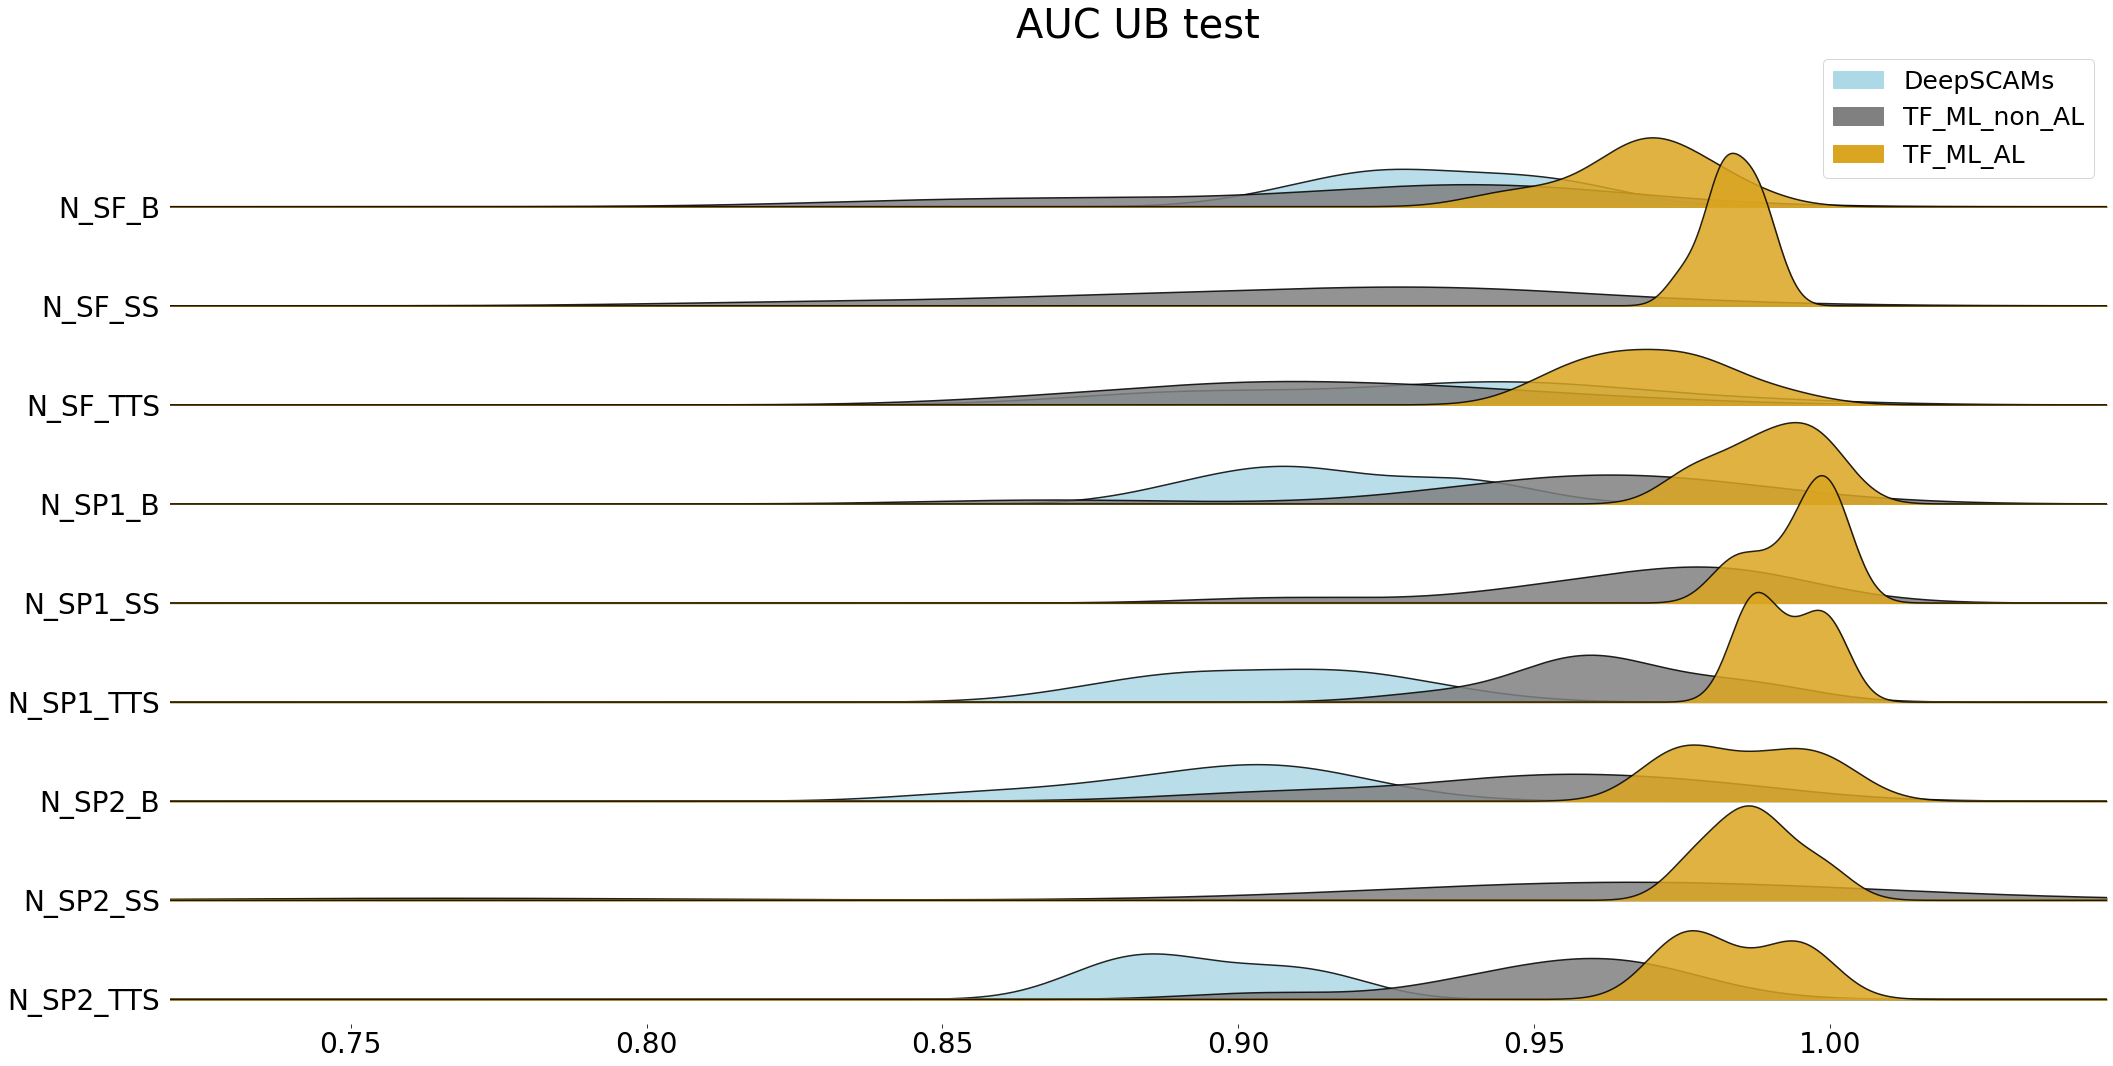

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.6153846153846154) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.5538461538461539) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

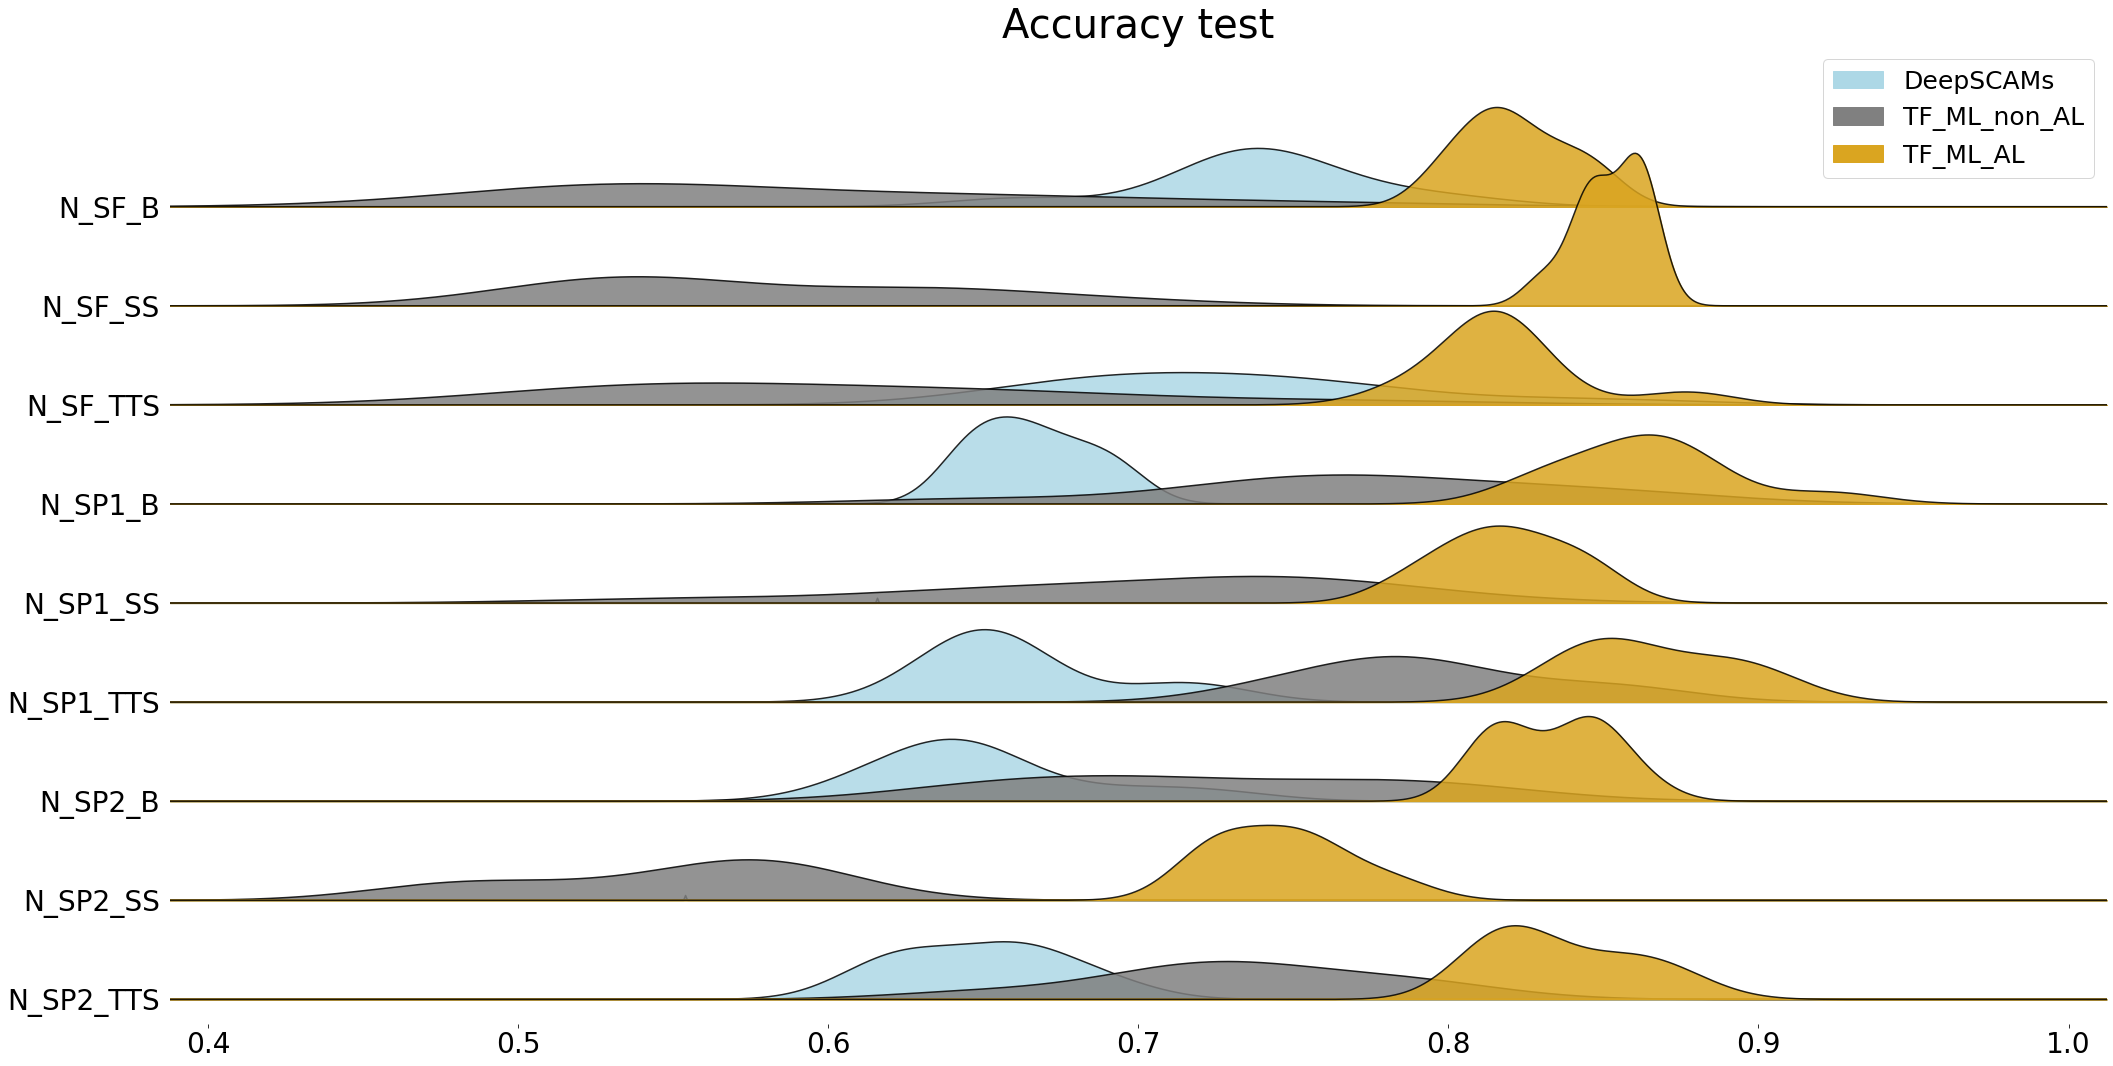

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.6666666666666665) having infinite probability density. Consider using a different visualization.

/home/khali/anaconda3/lib/python3.8/site-packages/joypy/joyplot.py:280: UserWarning:

The data contains a group with a single distinct value (0.6813186813186815) having infinite probability density. Consider using a different visualization.



<Figure size 432x288 with 0 Axes>

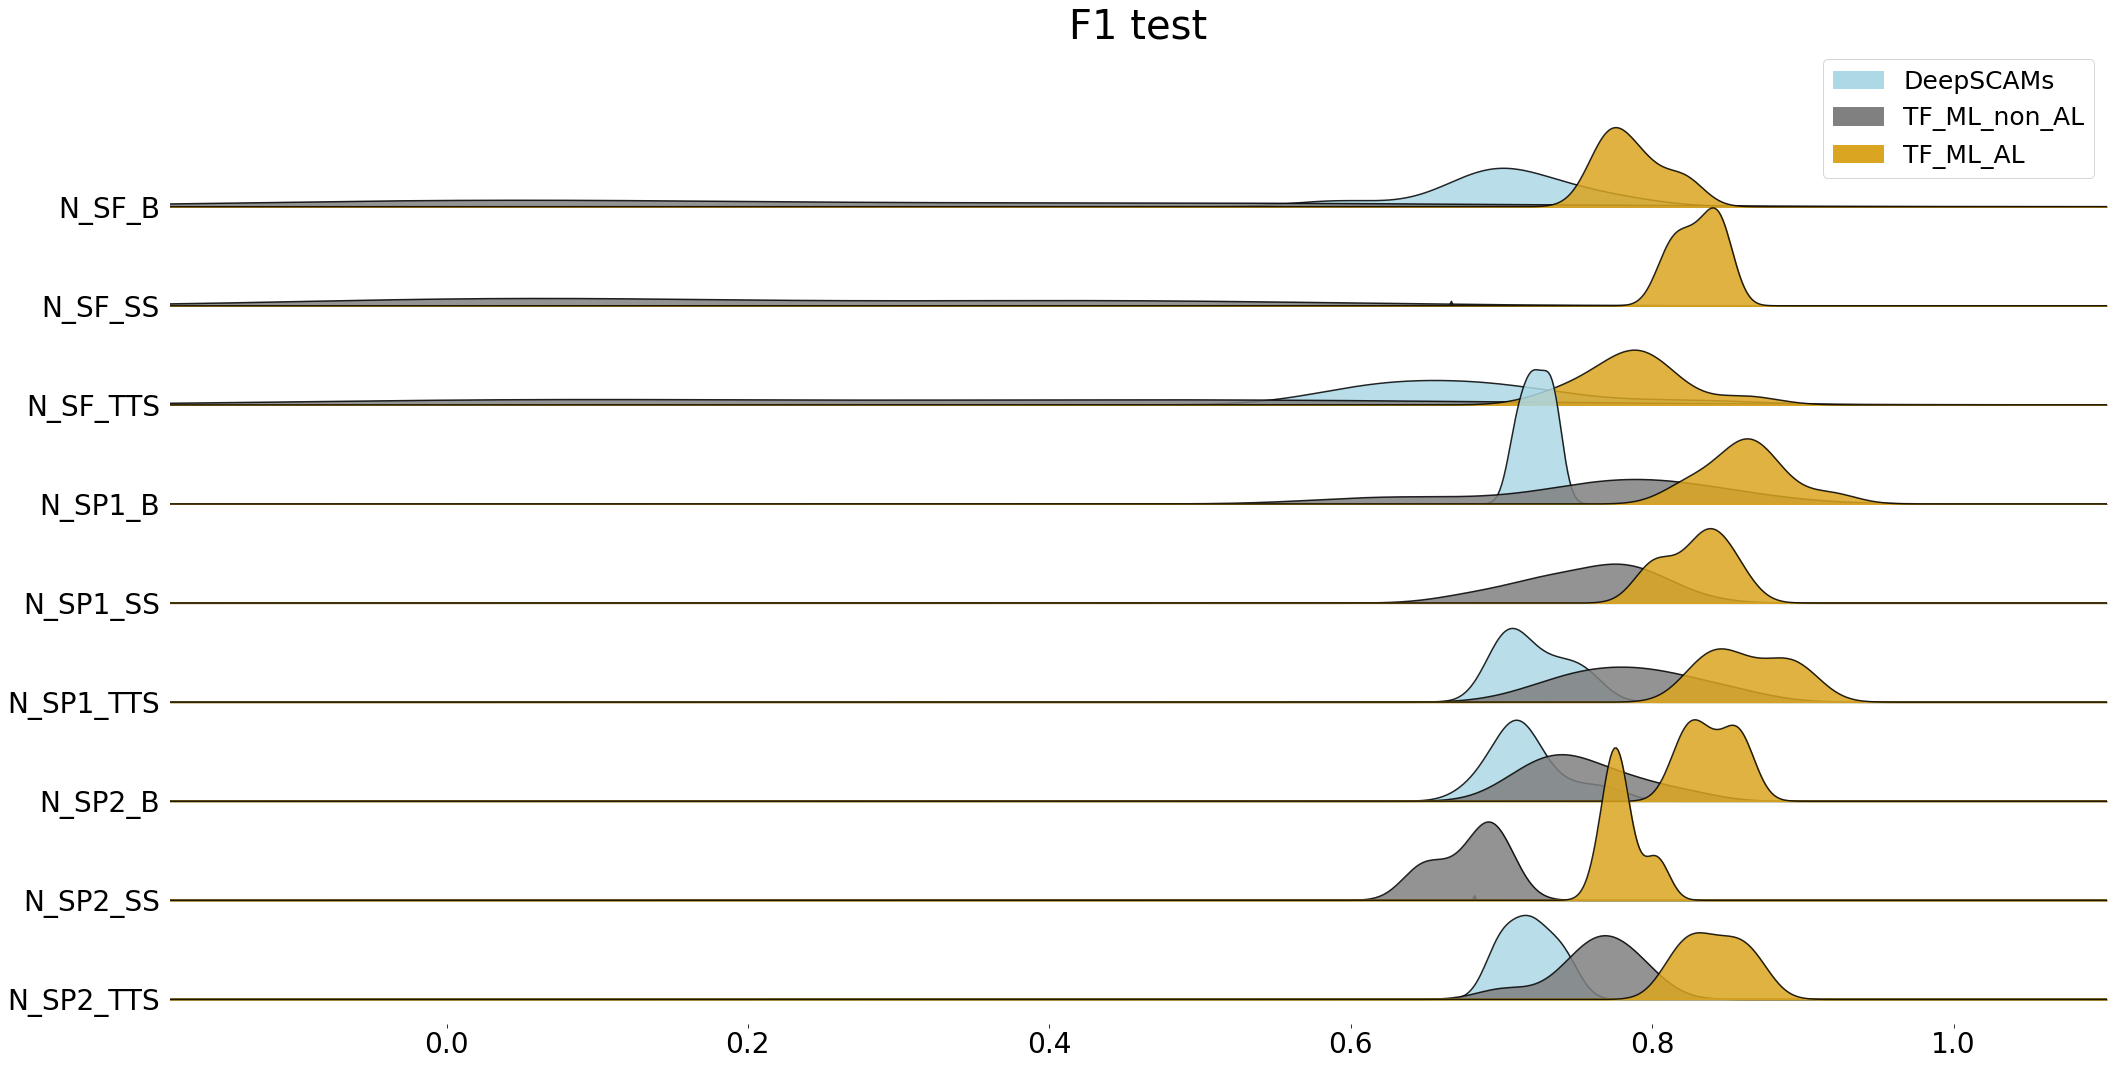

<Figure size 432x288 with 0 Axes>

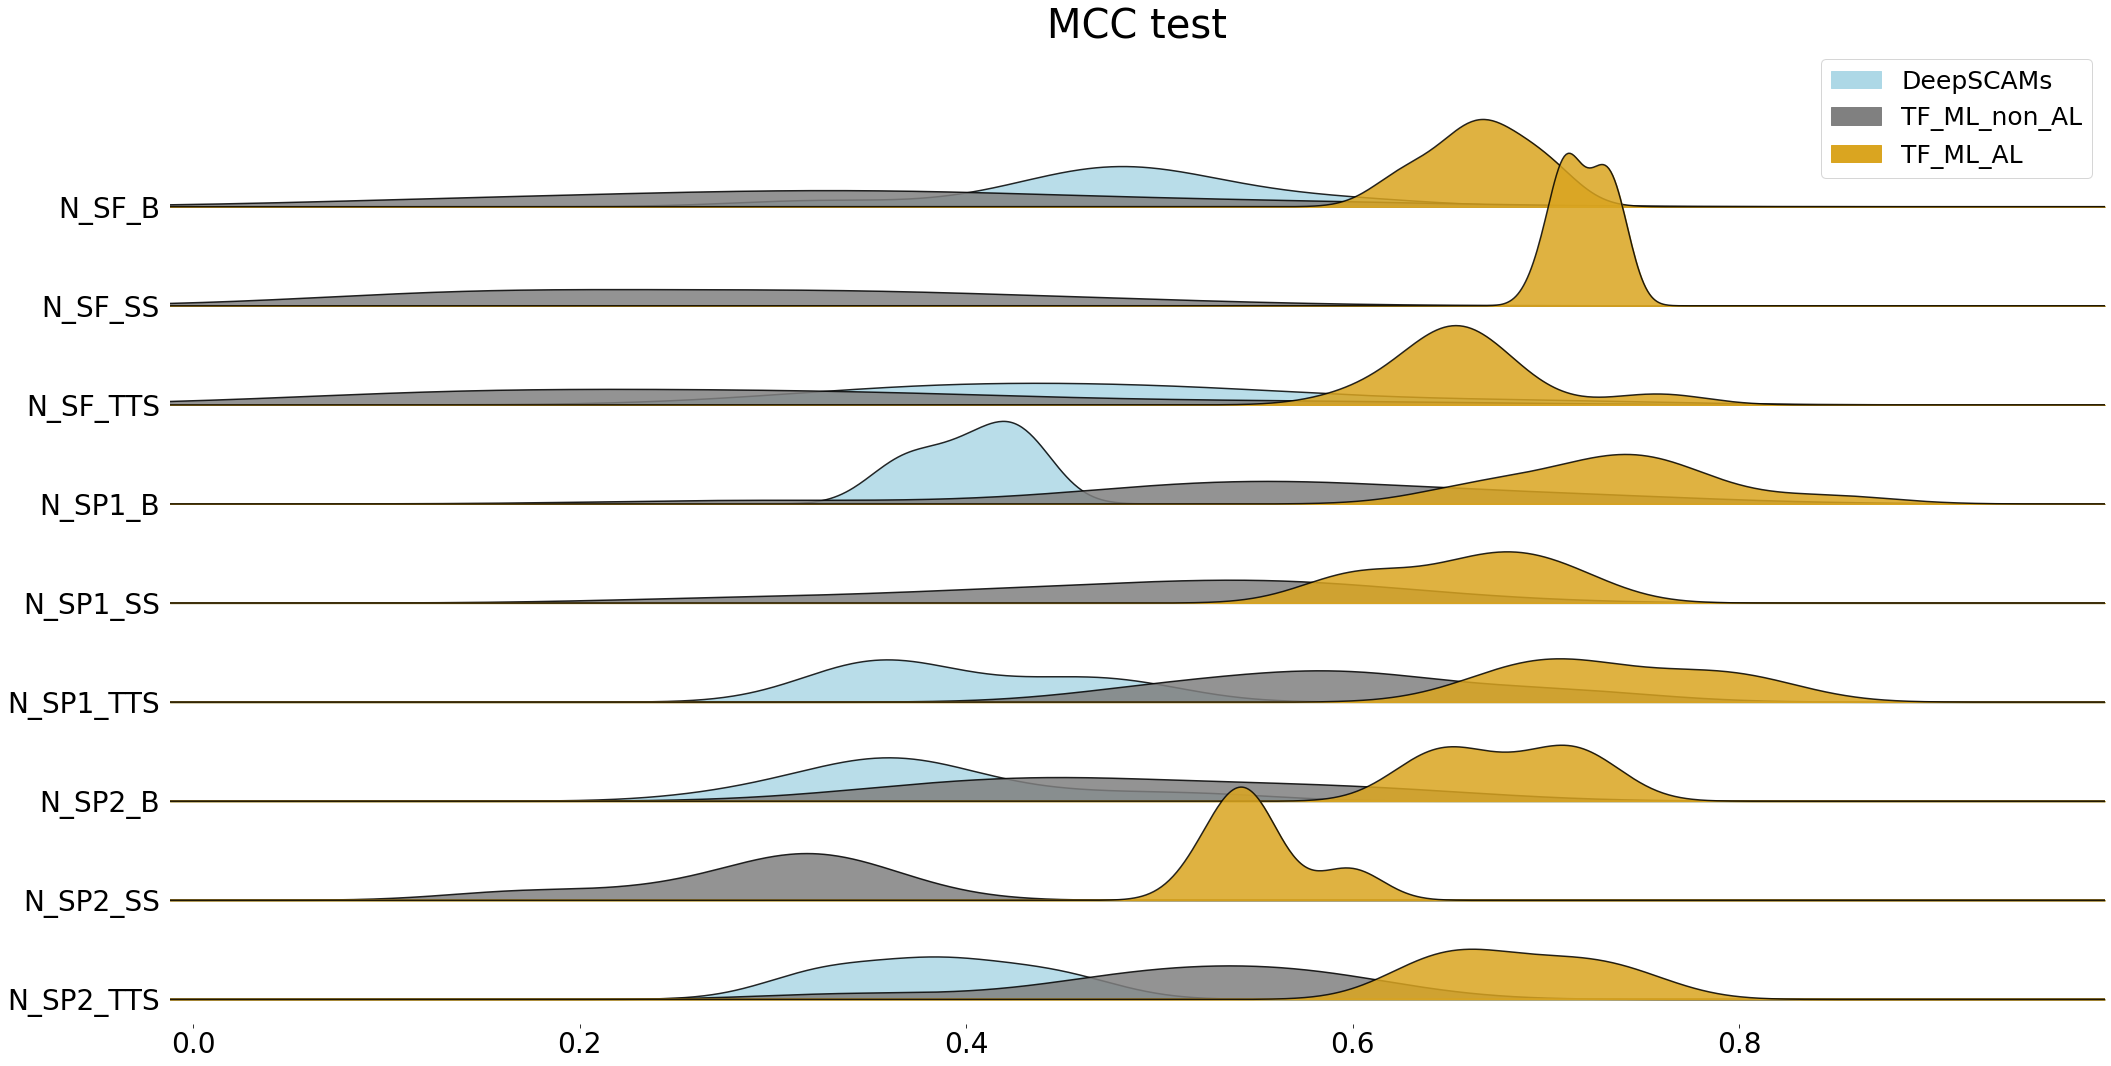

In [13]:
for met in metrics:
    make_ridgeline_plt_for_metric(working_dir, met)